Plotting 
-----
First we run a simple agent, then we plot the agents plans.

In [6]:
%pylab inline
figsize(10,10)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
import numpy as np
import TabulaRL.gridworld
import TabulaRL.finite_tabular_agents
from TabulaRL.query_functions import QueryFirstNVisits

from TabulaRL.feature_extractor import FeatureTrueState
from TabulaRL.experiment import run_finite_tabular_experiment
from TabulaRL.sqr import *

seed = 2 
numpy_rng = np.random.RandomState(seed)

#ENV
grid_width=4
epLen = 2 * grid_width - 1 + 8
num_episodes = 53
reward_sd = 2

env = gridworld.make_gridworld(grid_width, epLen, rewards={ (0, 0) : 1}, reward_noise=reward_sd)

# AGENT
query_cost=1.5
reward_tau = reward_sd**-2

agent = finite_tabular_agents.PSRLLimitedQuery(env.nState, env.nAction, env.epLen,
          scaling=.1, 
          P_true=env.P, R_true=None, 
          query_function=QueryFirstNVisits(query_cost, 5), 
          tau=reward_tau)

agent.R_prior = fillPrior(env, { (s,0) : (0, 1) for s in range(env.nState) }, (0, 10e10))

f_ext = FeatureTrueState(env.epLen, env.nState, env.nAction, env.nState)

# returns: cumReward, cumQueryCost, perf, cumRegret
results = run_finite_tabular_experiment(agent, env, f_ext, num_episodes, seed,
                    recFreq=1000, fileFreq=10000, targetPath='')   

episode: 10 epReward: -7.66351064943 epQueryCost: 10.5 perf: -100.457192939 cumRegret: 120.0
episode: 20 epReward: 12.0191663899 epQueryCost: 0.0 perf: -62.9705527217 cumRegret: 180.0
episode: 30 epReward: 17.4193940616 epQueryCost: 0.0 perf: 1.94266726701 cumRegret: 225.0
episode: 40 epReward: 32.0772220782 epQueryCost: 0.0 perf: 162.860446971 cumRegret: 225.0
episode: 50 epReward: 25.0367644906 epQueryCost: 0.0 perf: 300.978510189 cumRegret: 225.0


Plotting
-------
The following code creates a q-value plot using a library I cooked up: https://github.com/jsalvatier/gridworld-q-plot

`plotQ` plots the agents q values with directional arrows (which are colored with red being the best action). It also colors the state squares with the value (max Q) of the state.

`plotR` labels the states with the actual reward function in light grey "r=value".

`plotRBelief` labels the states with the agents belief's about r(s, action=0) as "[r_mean - r_sd, r_mean + r_sd]". 

Coords
-----
row=0,col=0 is in the upper left. 

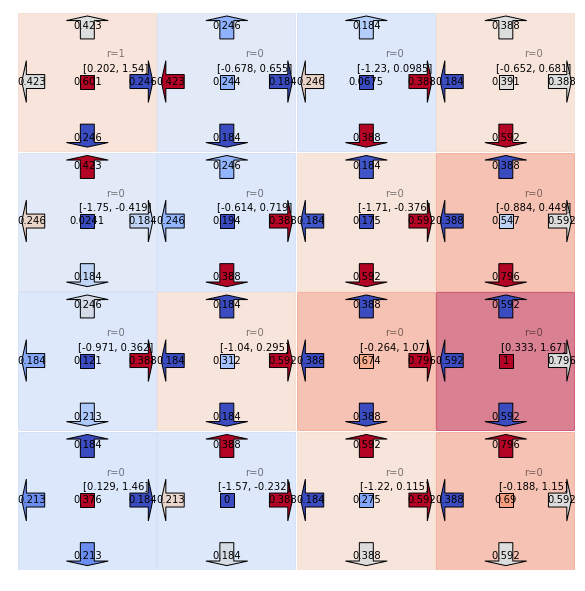

In [15]:
from gridworld_plot import plot 

action_directions = [
        plot.CENTER, 
        plot.UP, 
        plot.RIGHT, 
        plot.DOWN, 
        plot.LEFT]

fig, ax = plot.grid_plot(env)
qValues = agent.qVals

#agents qvalues at t=0
q = { s : qValues[s,0] for s in range(env.nState) }


plot.plotQ(ax, env, q, plot.plot_labeled_arrows(action_directions))
plot.plotR(ax, env, env.R)
plot.plotRBelief(ax, env, agent.R_prior)
axis('off')
fig.show()
